In [46]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime 

df = pd.read_csv('/Users/ladipo/Desktop/Charter/charter_pricepred/data/processed/data_generation.csv')
df.head()

,Charter Date,Vessel Type,Cargo Capacity (DWT),Container Capacity (TEU),Vessel Length (m),Vessel breadth (m),Charter Price ($/day),Duration (days),Fuel Cost ($/liter),LNG Capacity (m),LPG Capacity (m),Size Category,Cargo Type
0,2023-02-01,Product Tanker,119285.0,NaN,257,33,27434,111,0.77,NaN,NaN,LR2,Refined Products
1,2023-01-31,LNG Carrier,137534.0,NaN,254,40,48066,265,0.77,127822.0,NaN,Typical LNG Carrier,LNG
2,2021-08-23,Container Ship,NaN,3180.0,252,47,10293,108,0.53,NaN,NaN,Feeder Ships,Apparel
3,2021-07-15,Chemical Tanker,20856.0,NaN,174,26,24968,238,0.52,NaN,NaN,IMO Type 3,Chemicals
4,2023-01-24,Tanker,167984.0,NaN,129,37,24529,47,0.65,NaN,NaN,Handysize,Refined Products


In [47]:
df.iloc[:, [0, 1, 2, 3]]

,Charter Date,Vessel Type,Cargo Capacity (DWT),Container Capacity (TEU)
0,2023-02-01,Product Tanker,119285.0,NaN
1,2023-01-31,LNG Carrier,137534.0,NaN
2,2021-08-23,Container Ship,NaN,3180.0
3,2021-07-15,Chemical Tanker,20856.0,NaN
4,2023-01-24,Tanker,167984.0,NaN
...,...,...,...,...
2495,2023-01-27,LPG Carrier,27768.0,NaN
2496,2022-05-24,Tanker,205440.0,NaN
2497,2022-12-25,Chemical Tanker,17894.0,NaN
2498,2023-09-24,Product Tanker,59567.0,NaN


In [48]:
df.isnull().sum()

Charter Date                   0
Vessel Type                    0
Cargo Capacity (DWT)         354
Container Capacity (TEU)    2146
Vessel Length (m)              0
Vessel breadth (m)             0
Charter Price ($/day)          0
Duration (days)                0
Fuel Cost ($/liter)            0
LNG Capacity (m)            2164
LPG Capacity (m)            2164
Size Category                  0
Cargo Type                     0
dtype: int64

In [49]:
#Made all values lower case and replaced space with underscore for smooth reading
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['charter_date', 'vessel_type', 'cargo_capacity_(dwt)',
       'container_capacity_(teu)', 'vessel_length_(m)', 'vessel_breadth_(m)',
       'charter_price_($/day)', 'duration_(days)', 'fuel_cost_($/liter)',
       'lng_capacity_(m)', 'lpg_capacity_(m)', 'size_category', 'cargo_type'],
      dtype='object')

In [50]:
df['vessel_type'].value_counts()

vessel_type
Bulk Carrier       388
Chemical Tanker    378
Product Tanker     375
Container Ship     354
LNG Carrier        336
LPG Carrier        336
Tanker             333
Name: count, dtype: int64

In [51]:
# Handling Nan by filling with 0. All columns useful so no dropping
df = df.fillna(0)
df.head()

,charter_date,vessel_type,cargo_capacity_(dwt),container_capacity_(teu),vessel_length_(m),vessel_breadth_(m),charter_price_($/day),duration_(days),fuel_cost_($/liter),lng_capacity_(m),lpg_capacity_(m),size_category,cargo_type
0,2023-02-01,Product Tanker,119285.0,0.0,257,33,27434,111,0.77,0.0,0.0,LR2,Refined Products
1,2023-01-31,LNG Carrier,137534.0,0.0,254,40,48066,265,0.77,127822.0,0.0,Typical LNG Carrier,LNG
2,2021-08-23,Container Ship,0.0,3180.0,252,47,10293,108,0.53,0.0,0.0,Feeder Ships,Apparel
3,2021-07-15,Chemical Tanker,20856.0,0.0,174,26,24968,238,0.52,0.0,0.0,IMO Type 3,Chemicals
4,2023-01-24,Tanker,167984.0,0.0,129,37,24529,47,0.65,0.0,0.0,Handysize,Refined Products


In [52]:
df.dtypes

charter_date                 object
vessel_type                  object
cargo_capacity_(dwt)        float64
container_capacity_(teu)    float64
vessel_length_(m)             int64
vessel_breadth_(m)            int64
charter_price_($/day)         int64
duration_(days)               int64
fuel_cost_($/liter)         float64
lng_capacity_(m)            float64
lpg_capacity_(m)            float64
size_category                object
cargo_type                   object
dtype: object

In [53]:
df.describe()

,cargo_capacity_(dwt),container_capacity_(teu),vessel_length_(m),vessel_breadth_(m),charter_price_($/day),duration_(days),fuel_cost_($/liter),lng_capacity_(m),lpg_capacity_(m)
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,87447.560000,1173.677200,204.627600,36.777200,26706.337200,244.798400,0.652008,18502.956400,5777.849200
std,82111.013651,3135.638344,66.780176,11.636843,10490.137299,117.768896,0.086670,47039.759044,16755.093216
min,0.000000,0.000000,71.000000,14.000000,10013.000000,45.000000,0.500000,0.000000,0.000000
25%,22502.000000,0.000000,152.000000,28.000000,19180.000000,141.000000,0.580000,0.000000,0.000000
50%,66968.000000,0.000000,203.000000,37.000000,24480.000000,246.000000,0.650000,0.000000,0.000000
75%,136029.750000,0.000000,251.000000,45.000000,31855.500000,350.000000,0.730000,0.000000,0.000000
max,399193.000000,13986.000000,400.000000,65.000000,59959.000000,450.000000,0.800000,149932.000000,79511.000000


In [54]:
for col in df:
    print(df.duplicated().sum())
    print(df.shape)
    print(df.isnull().sum())

0
(2500, 13)
charter_date                0
vessel_type                 0
cargo_capacity_(dwt)        0
container_capacity_(teu)    0
vessel_length_(m)           0
vessel_breadth_(m)          0
charter_price_($/day)       0
duration_(days)             0
fuel_cost_($/liter)         0
lng_capacity_(m)            0
lpg_capacity_(m)            0
size_category               0
cargo_type                  0
dtype: int64
0
(2500, 13)
charter_date                0
vessel_type                 0
cargo_capacity_(dwt)        0
container_capacity_(teu)    0
vessel_length_(m)           0
vessel_breadth_(m)          0
charter_price_($/day)       0
duration_(days)             0
fuel_cost_($/liter)         0
lng_capacity_(m)            0
lpg_capacity_(m)            0
size_category               0
cargo_type                  0
dtype: int64
0
(2500, 13)
charter_date                0
vessel_type                 0
cargo_capacity_(dwt)        0
container_capacity_(teu)    0
vessel_length_(m)           0
vesse

In [55]:
for col in df.columns:
    print(f"Column: {col}")
    print(f"Number of duplicates in column '{col}': {df[col].duplicated().sum()}")
    print(f"Shape of DataFrame: {df.shape}")
    print(f"Number of null values in column '{col}': {df[col].isnull().sum()}")
    print("-" * 40)


Column: charter_date
Number of duplicates in column 'charter_date': 1491
Shape of DataFrame: (2500, 13)
Number of null values in column 'charter_date': 0
----------------------------------------
Column: vessel_type
Number of duplicates in column 'vessel_type': 2493
Shape of DataFrame: (2500, 13)
Number of null values in column 'vessel_type': 0
----------------------------------------
Column: cargo_capacity_(dwt)
Number of duplicates in column 'cargo_capacity_(dwt)': 366
Shape of DataFrame: (2500, 13)
Number of null values in column 'cargo_capacity_(dwt)': 0
----------------------------------------
Column: container_capacity_(teu)
Number of duplicates in column 'container_capacity_(teu)': 2153
Shape of DataFrame: (2500, 13)
Number of null values in column 'container_capacity_(teu)': 0
----------------------------------------
Column: vessel_length_(m)
Number of duplicates in column 'vessel_length_(m)': 2192
Shape of DataFrame: (2500, 13)
Number of null values in column 'vessel_length_(m)

In [56]:
df.head(2)

,charter_date,vessel_type,cargo_capacity_(dwt),container_capacity_(teu),vessel_length_(m),vessel_breadth_(m),charter_price_($/day),duration_(days),fuel_cost_($/liter),lng_capacity_(m),lpg_capacity_(m),size_category,cargo_type
0,2023-02-01,Product Tanker,119285.0,0.0,257,33,27434,111,0.77,0.0,0.0,LR2,Refined Products
1,2023-01-31,LNG Carrier,137534.0,0.0,254,40,48066,265,0.77,127822.0,0.0,Typical LNG Carrier,LNG


### Exploratory Data Analysis 

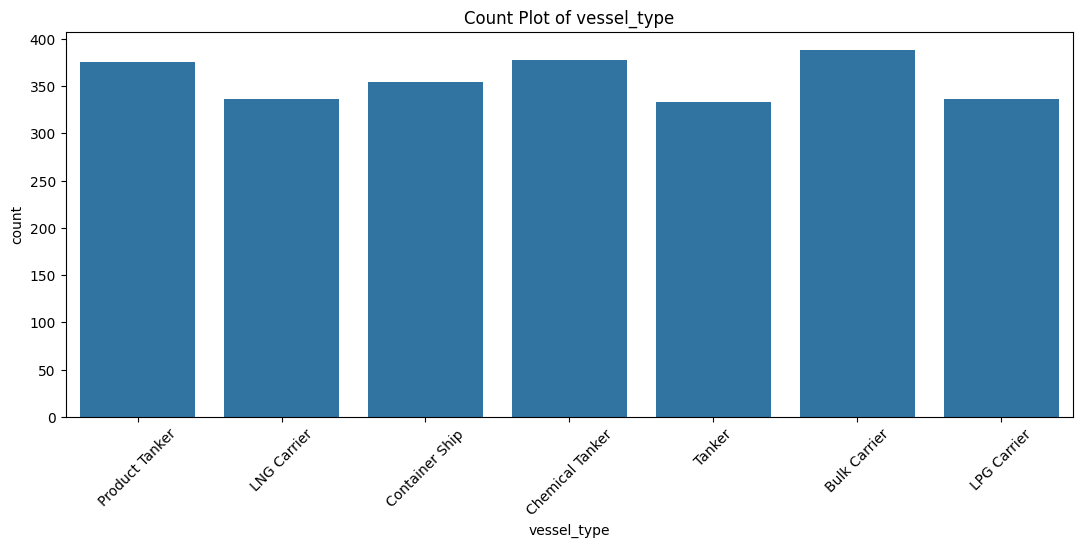

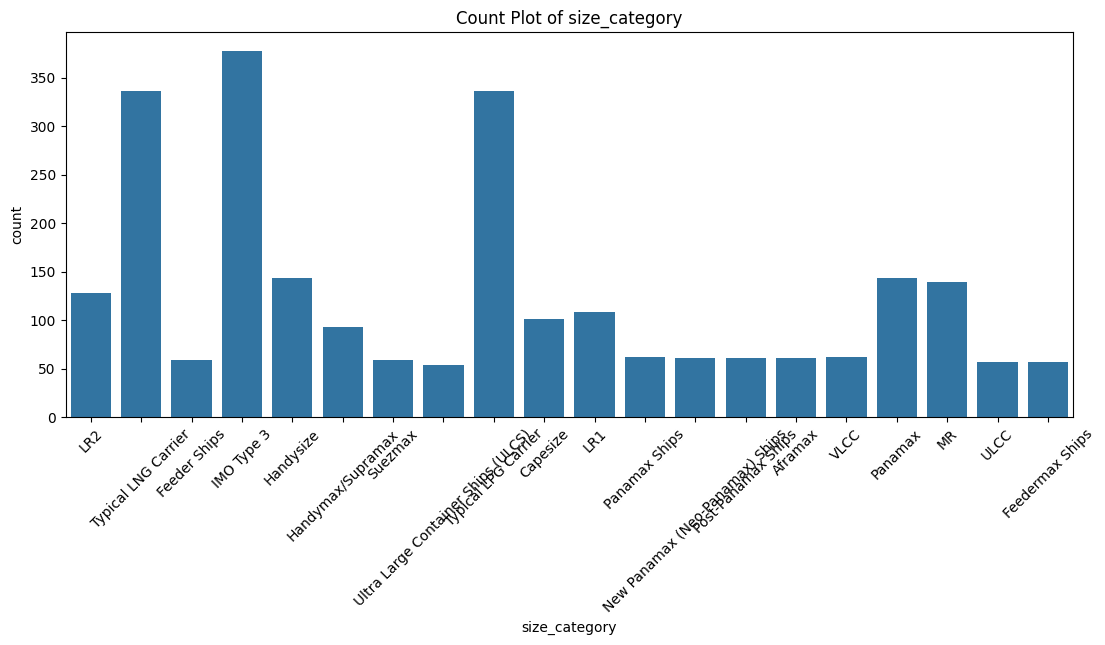

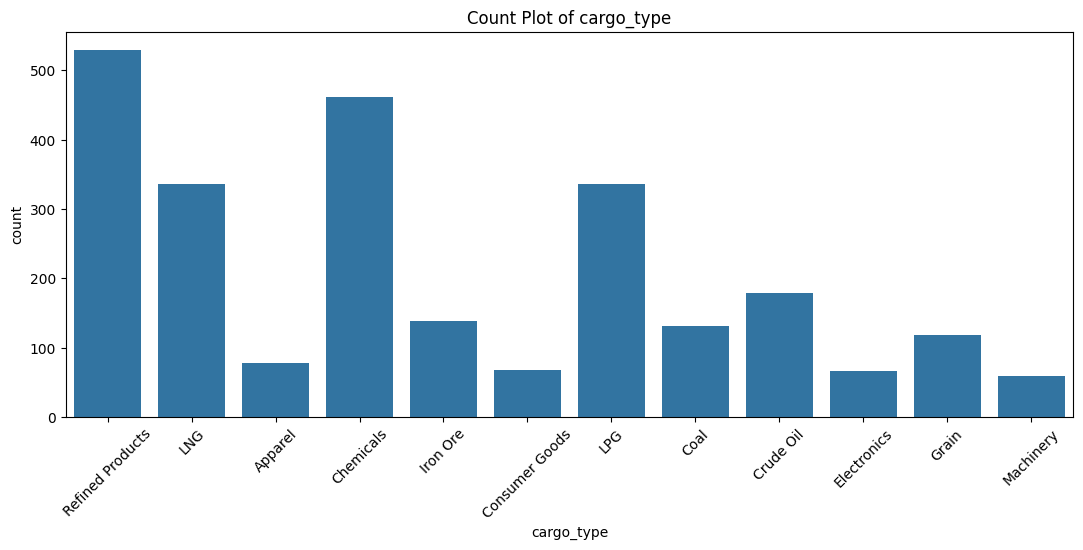

In [58]:
cat_var = ['vessel_type', 'size_category', 'cargo_type']

for col in cat_var:
    plt.figure(figsize = (13, 5))
    sns.countplot(x = df[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation = 45)
    plt.show()

In [59]:
for col in ['vessel_type', 'size_category', 'cargo_type']:
    print(df.groupby(col)['charter_price_($/day)'].describe())

                 count          mean           std      min       25%  \
vessel_type                                                             
Bulk Carrier     388.0  20088.793814   5991.711447  10016.0  14882.75   
Chemical Tanker  378.0  20119.835979   2839.748925  15020.0  17607.50   
Container Ship   354.0  22503.581921   6901.159332  10013.0  16213.25   
LNG Carrier      336.0  41976.136905  10106.488346  25083.0  34022.75   
LPG Carrier      336.0  31453.446429   6828.902417  20172.0  25775.50   
Product Tanker   375.0  21257.714667   5236.518819  12009.0  16765.00   
Tanker           333.0  32299.825826  10126.747563  15054.0  23496.00   

                     50%       75%      max  
vessel_type                                  
Bulk Carrier     20392.5  25157.50  29985.0  
Chemical Tanker  20283.0  22638.00  24985.0  
Container Ship   23033.0  27972.25  34995.0  
LNG Carrier      41824.0  50124.00  59959.0  
LPG Carrier      30784.5  37509.25  42992.0  
Product Tanker   212

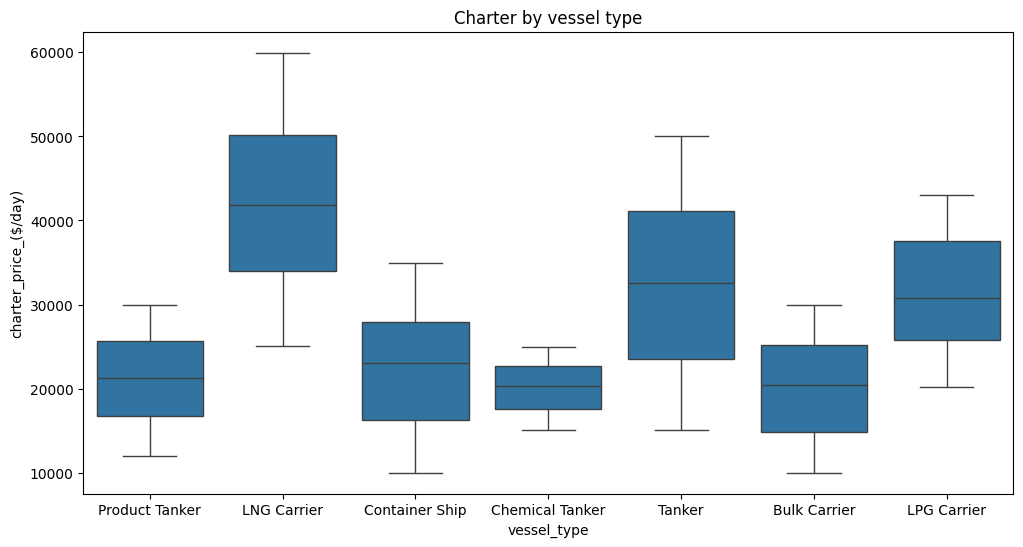

In [60]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'vessel_type' , y = 'charter_price_($/day)')
plt.title('Charter by vessel type')
plt.show()

In [61]:
#Sorting date out 

df['charter_date'] = pd.to_datetime(df['charter_date'])
df['year'] = df['charter_date'].dt.year
df['month'] = df['charter_date'].dt.month
df['day'] = df['charter_date'].dt.day
df.head(2)

,charter_date,vessel_type,cargo_capacity_(dwt),container_capacity_(teu),vessel_length_(m),vessel_breadth_(m),charter_price_($/day),duration_(days),fuel_cost_($/liter),lng_capacity_(m),lpg_capacity_(m),size_category,cargo_type,year,month,day
0,2023-02-01,Product Tanker,119285.0,0.0,257,33,27434,111,0.77,0.0,0.0,LR2,Refined Products,2023,2,1
1,2023-01-31,LNG Carrier,137534.0,0.0,254,40,48066,265,0.77,127822.0,0.0,Typical LNG Carrier,LNG,2023,1,31


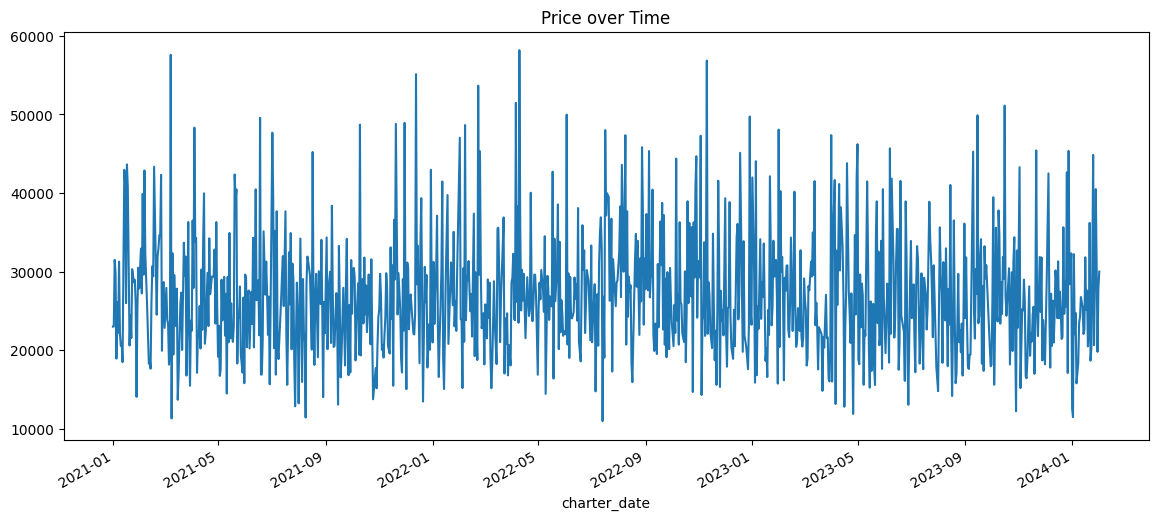

In [62]:
import matplotlib.dates as mdates

plt.figure(figsize = (14,6))
df.groupby('charter_date')['charter_price_($/day)'].mean().plot()
plt.title('Price over Time')
plt.show()

In [63]:
# Histograms and Boxplots for cargo capacity, container capacity, vessel length, and vessel breadth
numerical_cols_1 = ['cargo_capacity_(dwt)', 'container_capacity_(teu)', 'vessel_length_(m)', 'vessel_breadth_(m)']

# Histograms and Boxplots for charter price, duration, and fuel cost
numerical_cols_2 = ['charter_price_($/day)', 'duration_(days)', 'fuel_cost_($/liter)']

# Histograms and Boxplots for LNG and LPG capacity
numerical_cols_3 = ['lng_capacity_(m)', 'lpg_capacity_(m)']

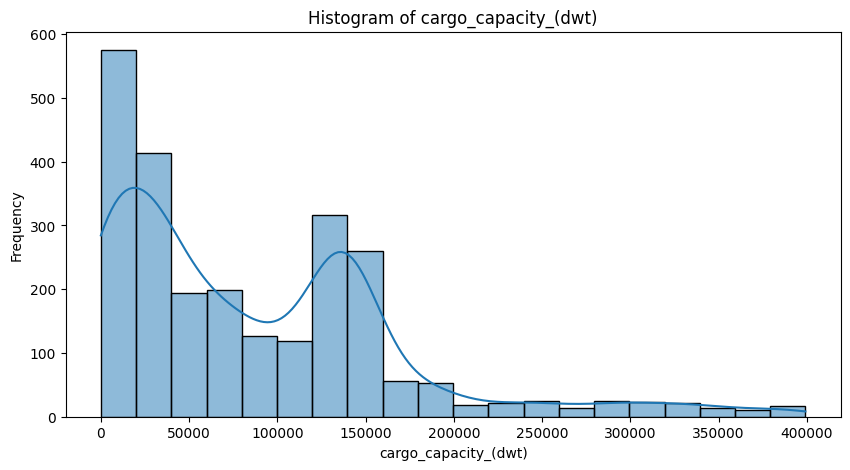

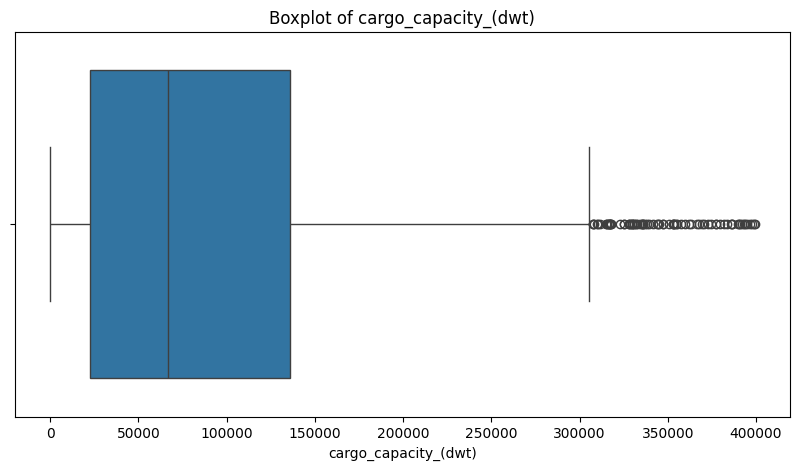

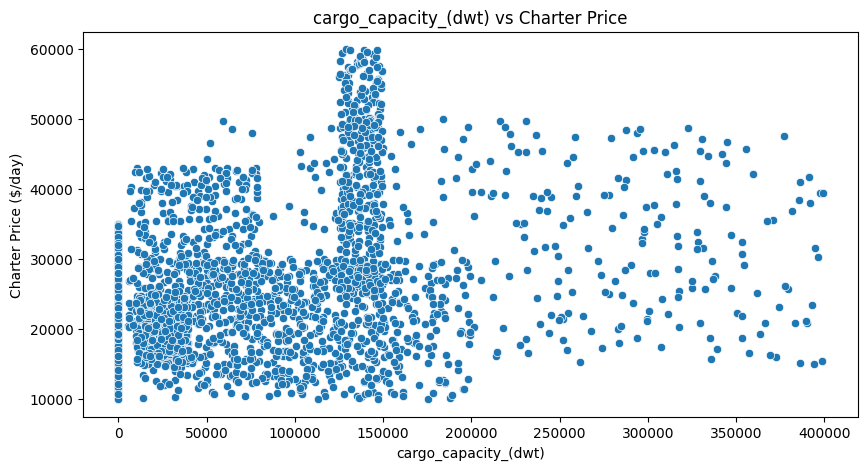

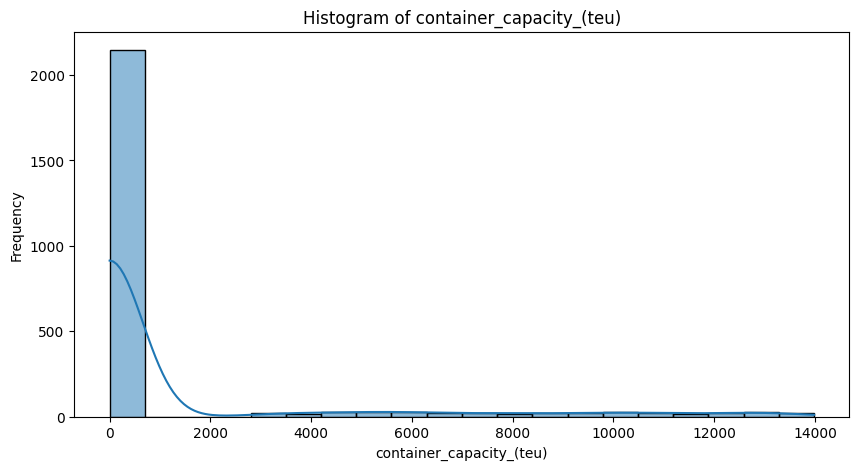

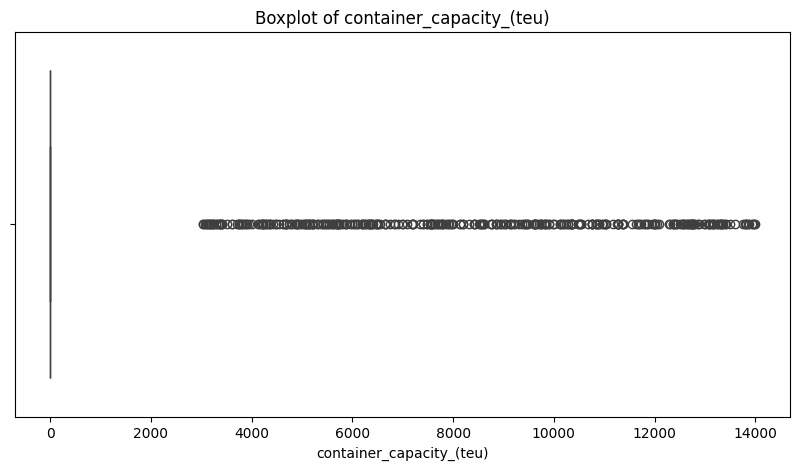

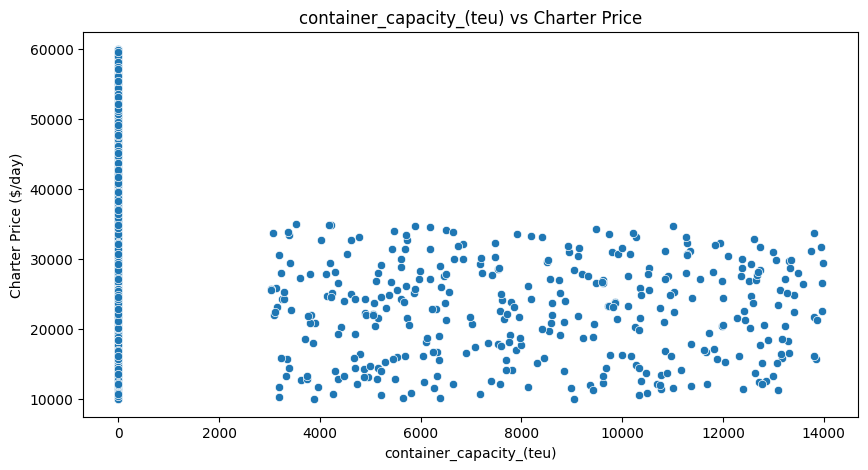

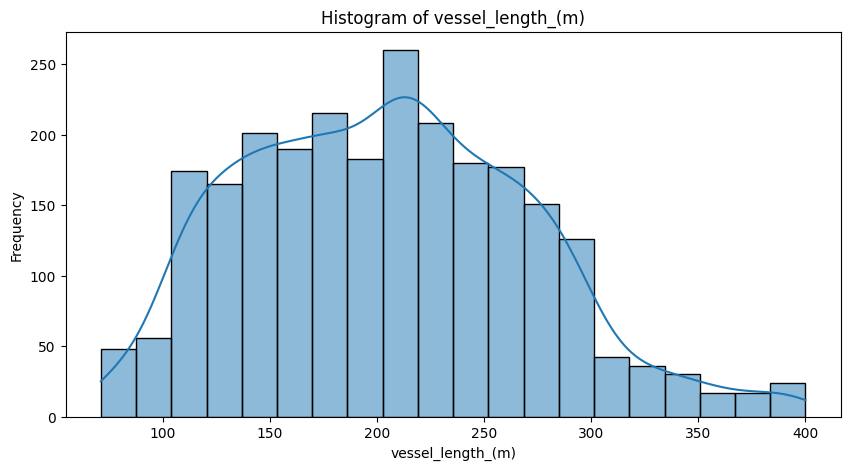

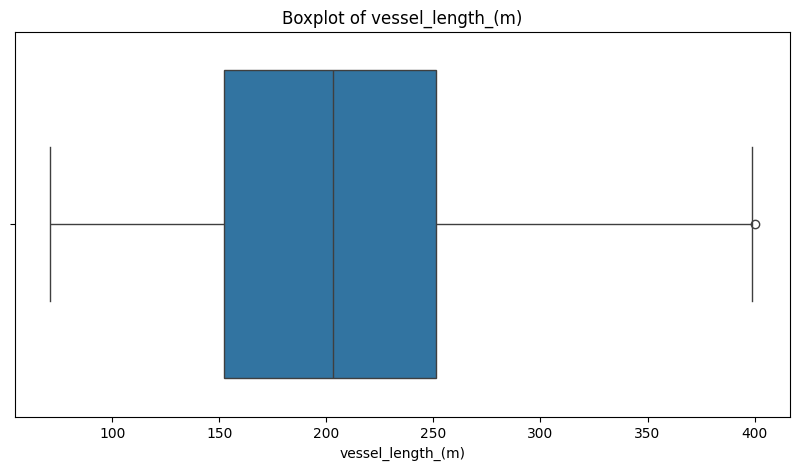

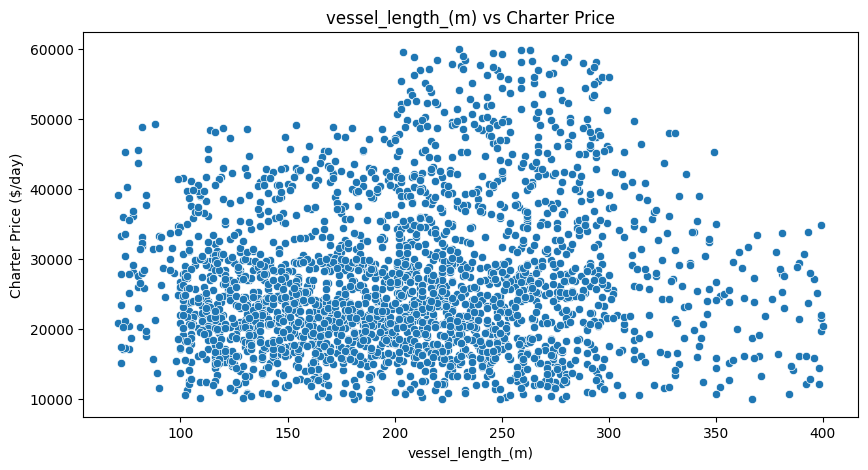

In [68]:
# Histograms and Boxplots for cargo capacity, container capacity, vessel length, and vessel breadth
numerical_cols_1 = ['cargo_capacity_(dwt)', 'container_capacity_(teu)', 'vessel_length_(m)']
for col in numerical_cols_1:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

    # Scatter Plots for relationships with charter price
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=col, y='charter_price_($/day)')
    plt.title(f'{col} vs Charter Price')
    plt.xlabel(col)
    plt.ylabel('Charter Price ($/day)')
    plt.show()


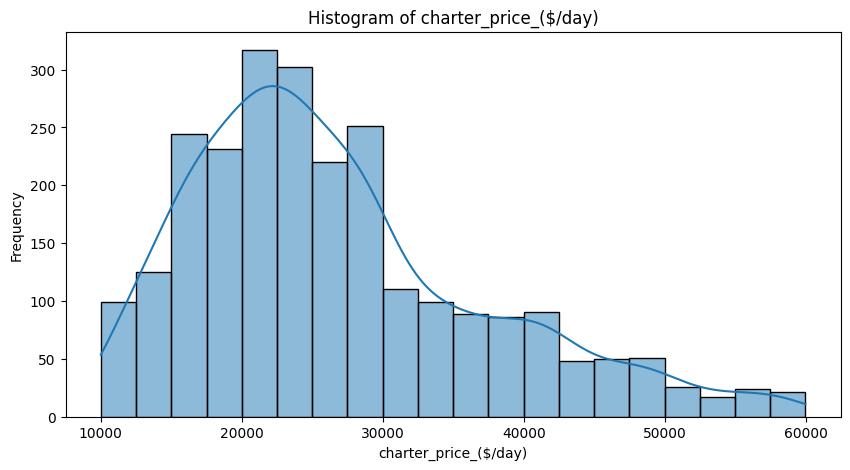

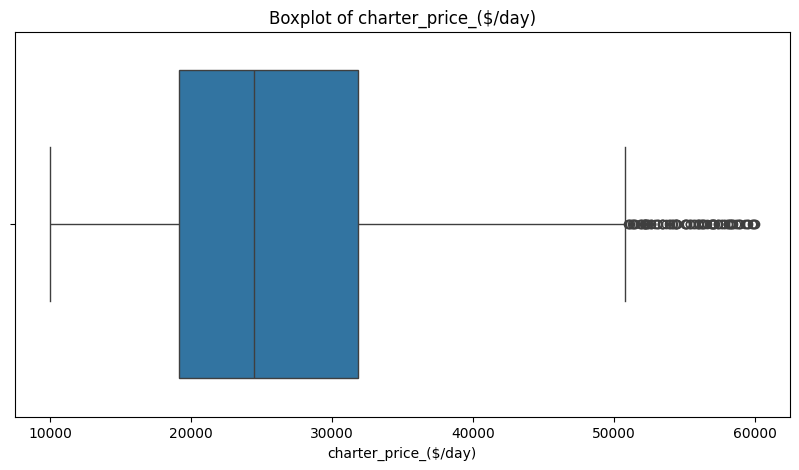

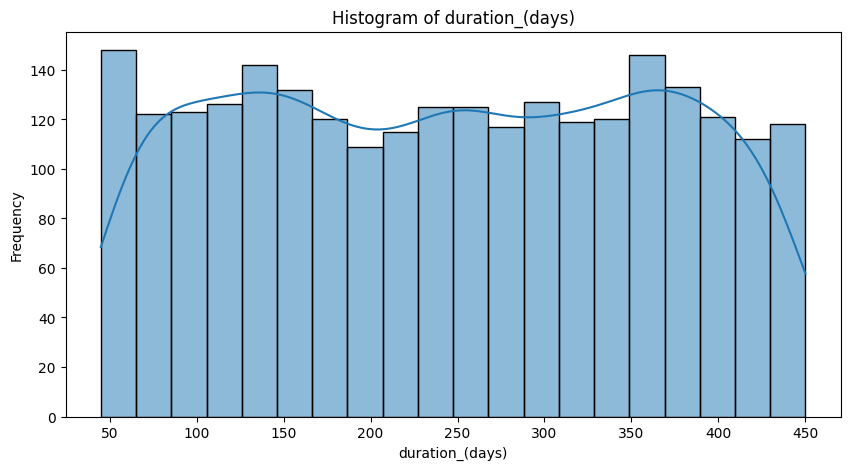

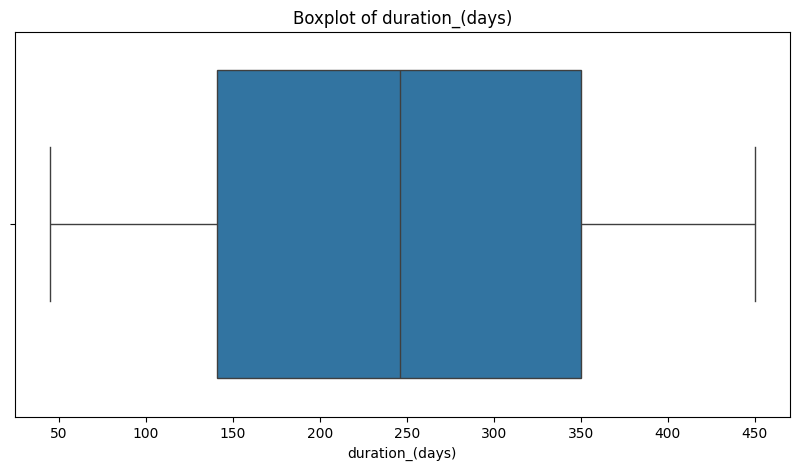

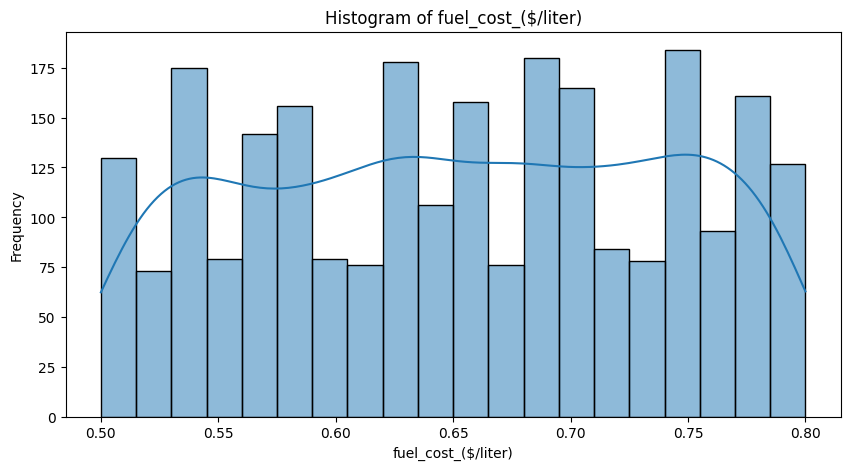

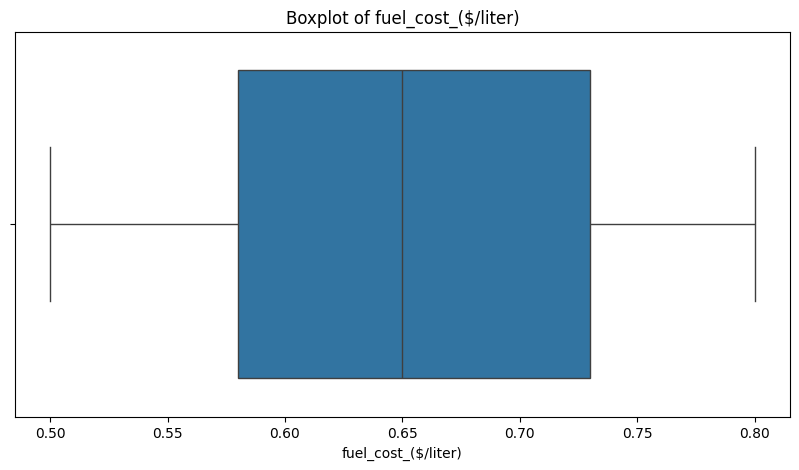

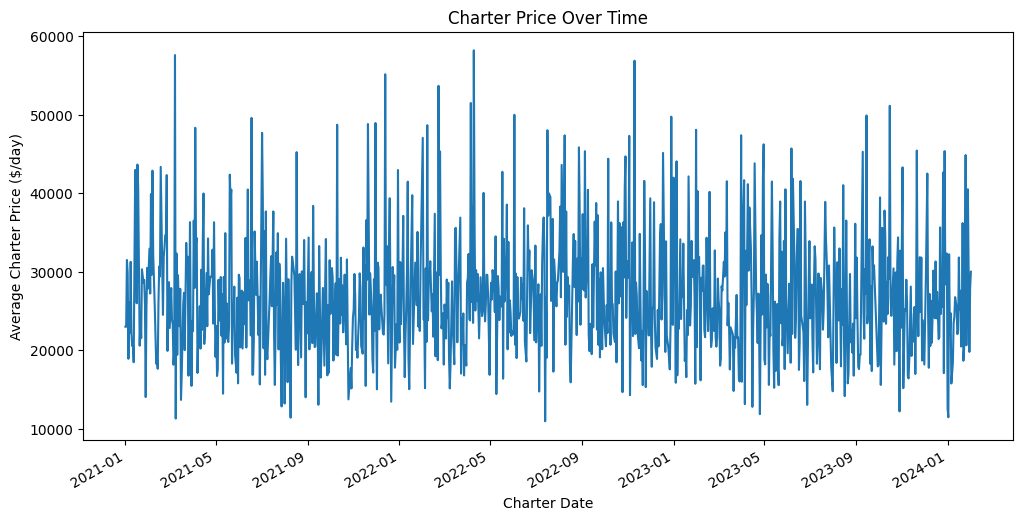

ValueError: could not convert string to float: 'Product Tanker'

<Figure size 1200x800 with 0 Axes>

In [69]:
# Histograms and Boxplots for charter price, duration, and fuel cost
numerical_cols_2 = ['charter_price_($/day)', 'duration_(days)', 'fuel_cost_($/liter)']
for col in numerical_cols_2:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# Time Series Analysis: Trends over time for charter price
plt.figure(figsize=(12, 6))
df.groupby('charter_date')['charter_price_($/day)'].mean().plot()
plt.title('Charter Price Over Time')
plt.xlabel('Charter Date')
plt.ylabel('Average Charter Price ($/day)')
plt.show()

# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


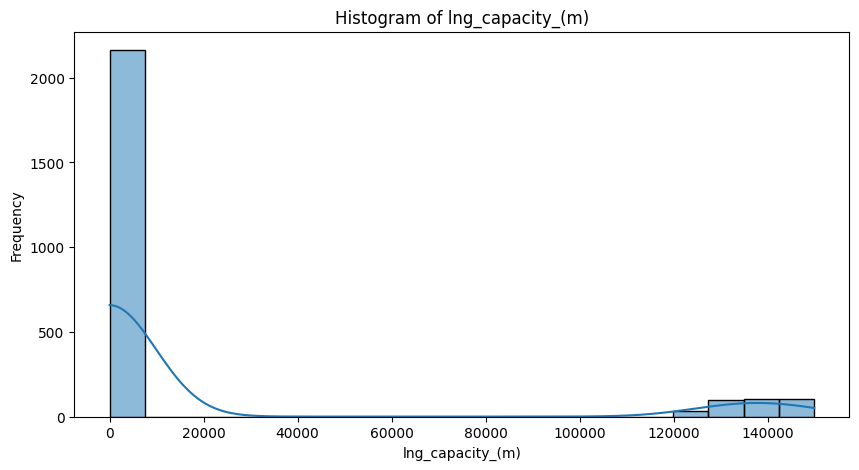

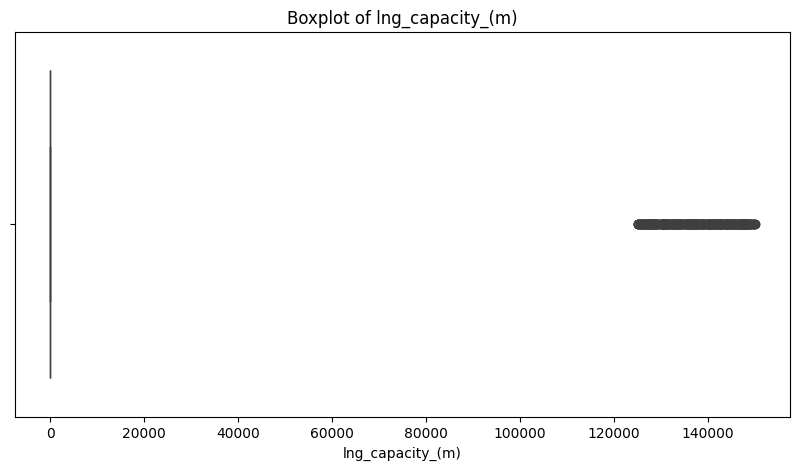

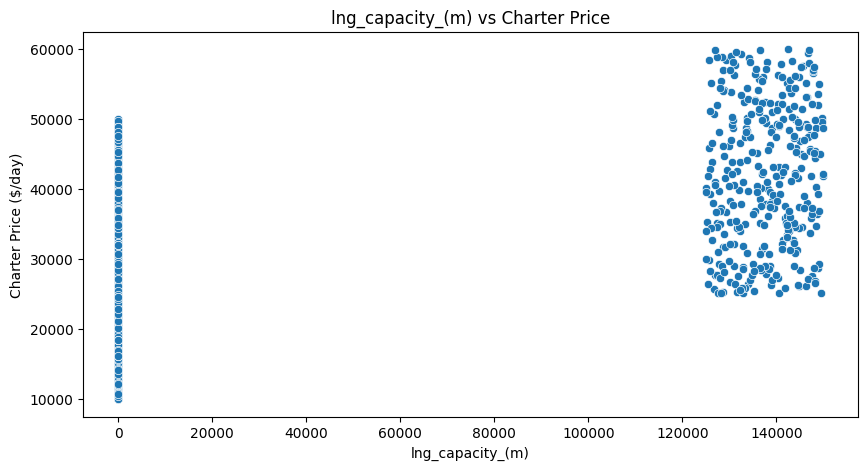

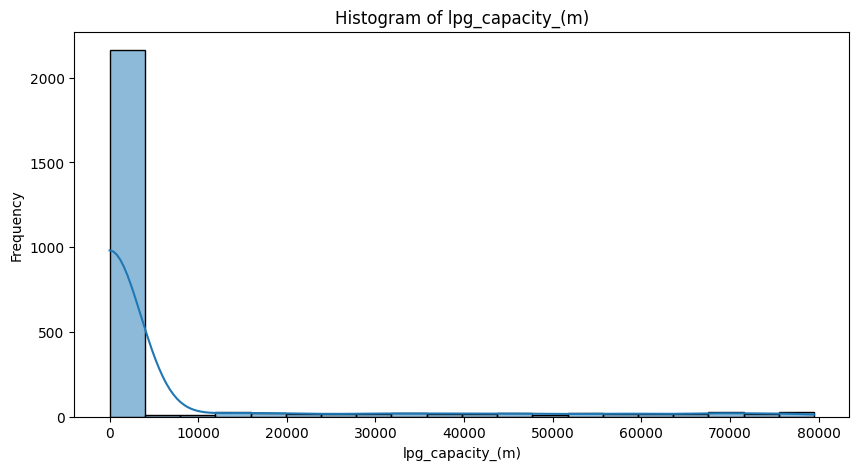

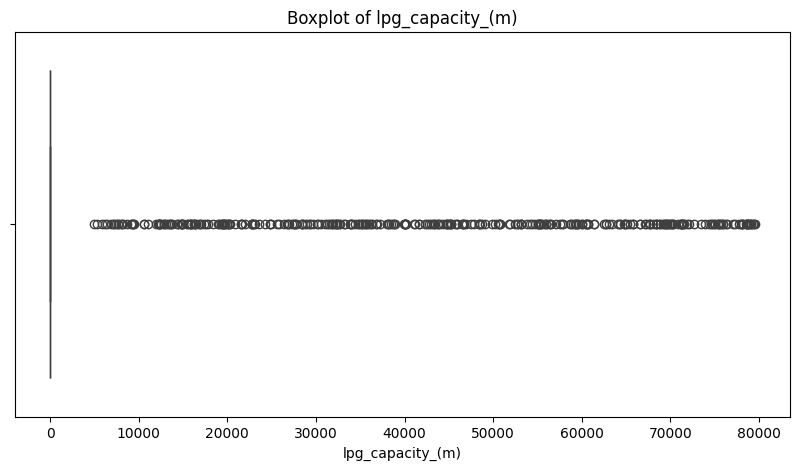

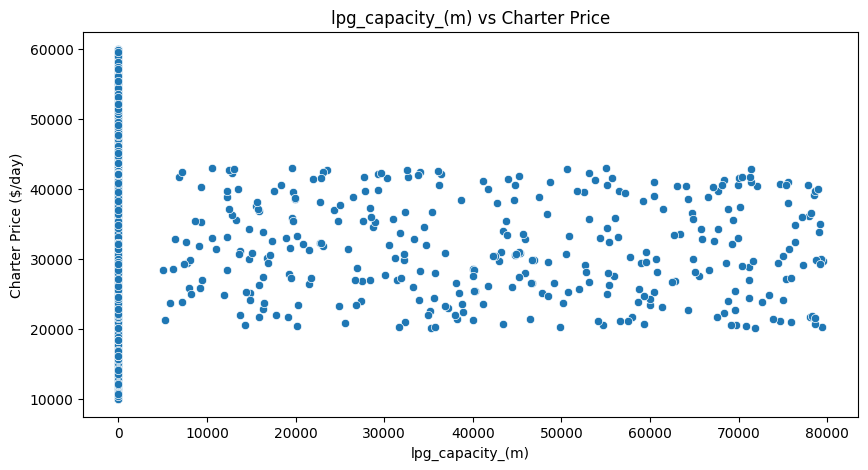

In [70]:
# Histograms and Boxplots for LNG and LPG capacity
numerical_cols_3 = ['lng_capacity_(m)', 'lpg_capacity_(m)']
for col in numerical_cols_3:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

    # Scatter Plots for relationships with charter price
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=col, y='charter_price_($/day)')
    plt.title(f'{col} vs Charter Price')
    plt.xlabel(col)
    plt.ylabel('Charter Price ($/day)')
    plt.show()


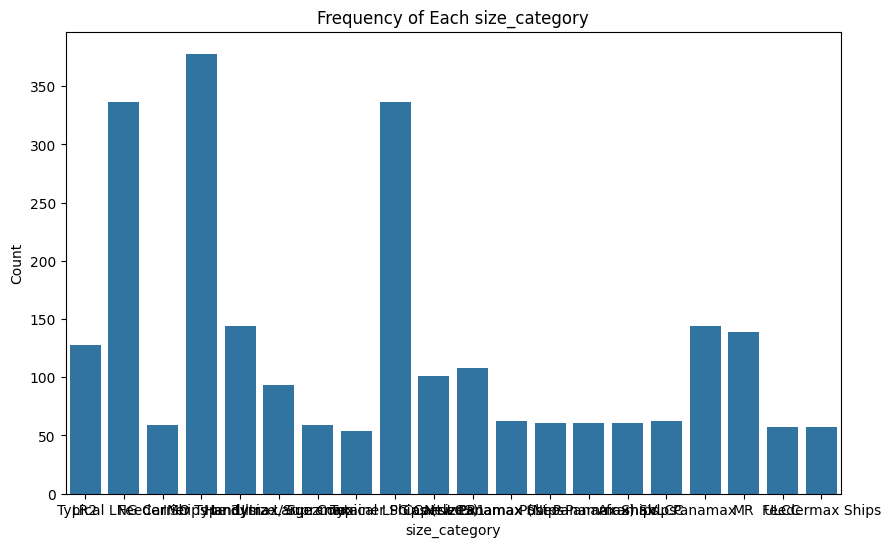

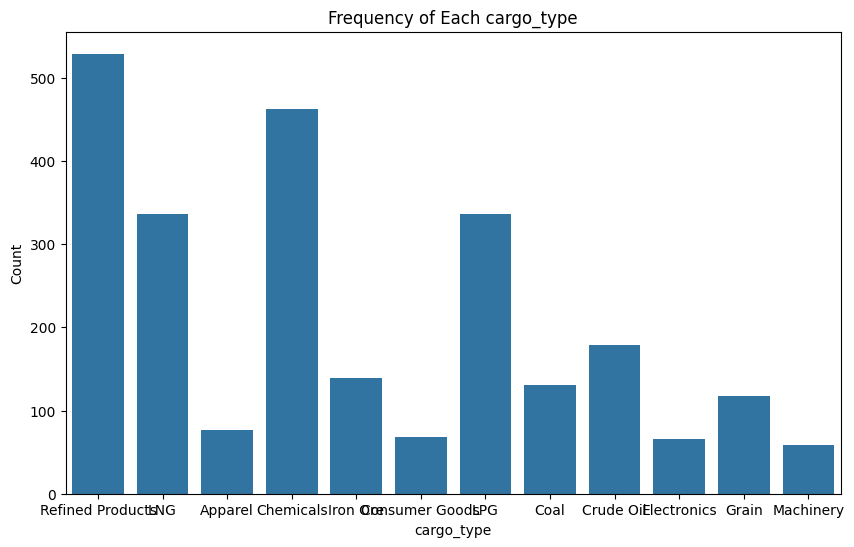

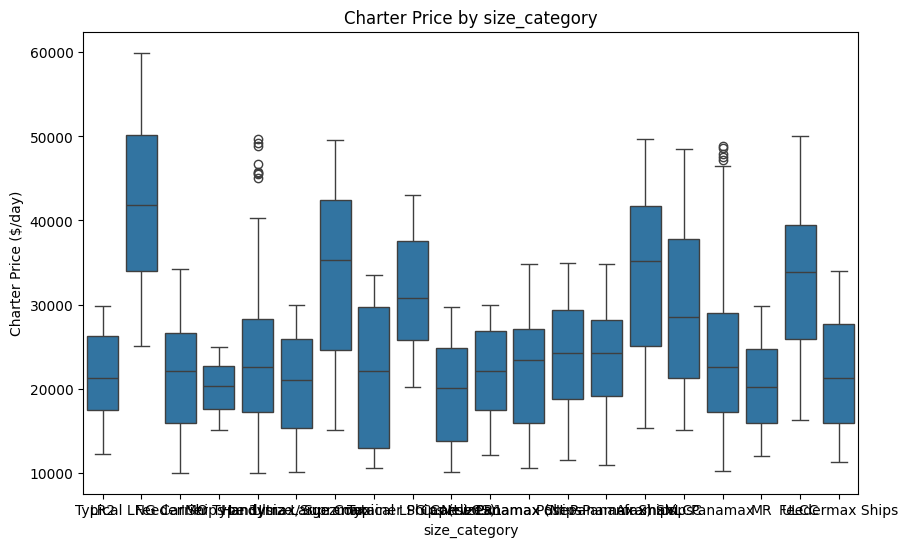

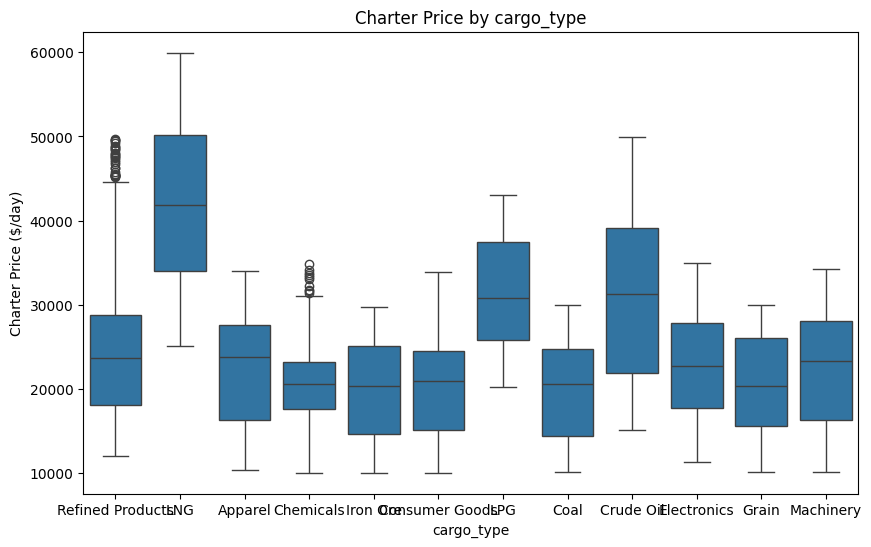

In [71]:
# Count Plots for size category and cargo type
categorical_cols = ['size_category', 'cargo_type']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Frequency of Each {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Comparison: Charter price by size category and cargo type
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col, y='charter_price_($/day)')
    plt.title(f'Charter Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Charter Price ($/day)')
    plt.show()
